Problem Statement:

In this project, initially you need to preprocess the data and then develop an understanding of different features of the data by performing exploratory analysis and creating visualizations.Further, after having sufficient knowledge about the attributes you will perform a predictive task of classification to predict whether an individual makes over 50K a year or less,by using different Machine Learning Algorithms. 

1. Data Preprocessing:

a) Replace all the missing values with NA.

b) Remove all the rows that contain NA values. 


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('census-income.csv')

In [5]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' '],
      dtype='object')

In [7]:
df.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
                   0
dtype: int64

In [8]:
# from above result we can see there are no missing values in the dataset

2. Data Manipulation:  

a) Extract the “education” column and store it in “census_ed” .

b) Extract all the columns from “age” to “relationship” and store it in “census_seq”.

c) Extract the column number “5”, “8”, “11” and store it in “census_col”.

d) Extract all the male employees who work in state-gov and store it in “male_gov”.

e) Extract all the 39 year olds who either have a bachelor's degree or who are native of the United States and store the result in “census_us”.

f) Extract 200 random rows from the “census” data frame and store it in “census_200”.

g) Get the count of different levels of the “workclass” column.

h) Calculate the mean of the “capital.gain” column grouped according to “workclass”.

i) Create a separate dataframe with the details of males and females from the census data that has income more than 50,000. 

j) Calculate the percentage of people from the United States who are private employees and earn less than 50,000 annually. 

k) Calculate the percentage of married people in the census data.

l) Calculate the percentage of high school graduates earning more than 50,000 annually. 


Before data manipulation removing the space at starting of each column of dataset and naming the last column as 'Earnings'

In [9]:
old_columns = df.columns

In [10]:
old_columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' '],
      dtype='object')

In [11]:
new_columns = []
for column in old_columns:
  column = column.strip(' ')
  new_columns.append(column)

In [12]:
new_columns

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 '']

In [13]:
new_columns[-1] = 'Earnings'

In [14]:
new_columns

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'Earnings']

In [15]:
df.columns = new_columns

In [16]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Earnings'],
      dtype='object')

#Tasks of data manipulation
a) Extract the “education” column and store it in “census_ed” .

In [17]:
census_ed = df['education']
census_ed

0          Bachelors
1          Bachelors
2            HS-grad
3               11th
4          Bachelors
            ...     
32556     Assoc-acdm
32557        HS-grad
32558        HS-grad
32559        HS-grad
32560        HS-grad
Name: education, Length: 32561, dtype: object

b) Extract all the columns from “age” to “relationship” and store it in “census_seq”.

In [18]:
census_seq = df.loc[:,'age':'relationship']
census_seq

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife
...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child


c) Extract the column number “5”, “8”, “11” and store it in “census_col”.

In [19]:
census_col = df.iloc[:,4:12:3]
census_col

,education-num,relationship,capital-gain
0,13,Not-in-family,2174
1,13,Husband,0
2,9,Not-in-family,0
3,7,Husband,0
4,13,Wife,0
...,...,...,...
32556,12,Wife,0
32557,9,Husband,0
32558,9,Unmarried,0
32559,9,Own-child,0


d) Extract all the male employees who work in state-gov and store it in “male_gov”.

In [20]:
df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [21]:
male_gov=df.loc[(df.sex==' Male')&(df.workclass==' State-gov')]
male_gov

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Earnings
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
34,22,State-gov,311512,Some-college,10,Married-civ-spouse,Other-service,Husband,Black,Male,0,0,15,United-States,<=50K
48,41,State-gov,101603,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
123,29,State-gov,267989,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32163,36,State-gov,135874,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
32241,45,State-gov,231013,Bachelors,13,Divorced,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32321,54,State-gov,138852,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
32324,42,State-gov,138162,Some-college,10,Divorced,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K


e) Extract all the 39 year olds who either have a bachelor's degree or who are native of the United States and store the result in “census_us”.

In [22]:
census_us = df.loc[(df.age==39)&((df.education==' Bachelors')|(df['native-country']==' United-States'))]

In [23]:
census_us

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Earnings
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
28,39,Private,367260,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,80,United-States,<=50K
129,39,Private,365739,Some-college,10,Divorced,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K
166,39,Federal-gov,235485,Assoc-acdm,12,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,42,United-States,<=50K
320,39,Self-emp-not-inc,174308,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32146,39,Private,117381,Some-college,10,Divorced,Transport-moving,Not-in-family,White,Male,0,0,65,United-States,<=50K
32260,39,Federal-gov,232036,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K
32428,39,Federal-gov,110622,Bachelors,13,Married-civ-spouse,Adm-clerical,Wife,Asian-Pac-Islander,Female,0,0,40,Philippines,<=50K
32468,39,Self-emp-not-inc,193689,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,65,United-States,<=50K


In [24]:
df['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

f) Extract 200 random rows from the “census” data frame and store it in “census_200”.

In [25]:
census_200 = df.sample(n=200)
census_200

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Earnings
5771,46,Private,137354,Masters,14,Married-civ-spouse,Tech-support,Husband,Asian-Pac-Islander,Male,0,0,40,Philippines,>50K
29373,41,Private,180181,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,40,United-States,<=50K
17105,27,Private,188171,10th,6,Never-married,Adm-clerical,Own-child,White,Male,0,0,60,United-States,<=50K
20037,18,Private,90934,Some-college,10,Never-married,Sales,Own-child,White,Male,0,0,28,United-States,<=50K
1464,40,Private,100584,10th,6,Divorced,Craft-repair,Not-in-family,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19690,38,Self-emp-not-inc,334366,Some-college,10,Married-civ-spouse,Farming-fishing,Wife,White,Female,0,0,15,United-States,<=50K
19630,22,Private,615367,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,60,United-States,<=50K
7661,18,Private,118847,12th,8,Never-married,Sales,Own-child,White,Female,0,0,20,United-States,<=50K
21284,35,Private,167735,11th,7,Never-married,Craft-repair,Own-child,White,Male,6849,0,40,United-States,<=50K


g) Get the count of different levels of the “workclass” column.

In [26]:
df.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

h) Calculate the mean of the “capital.gain” column grouped according to “workclass”.

In [27]:
df.groupby('workclass').agg({'capital-gain':'mean'})

,capital-gain
workclass,
?,606.795752
Federal-gov,833.232292
Local-gov,880.202580
Never-worked,0.000000
Private,889.217792
Self-emp-inc,4875.693548
Self-emp-not-inc,1886.061787
State-gov,701.699538
Without-pay,487.857143


i) Create a separate dataframe with the details of males and females from the census data that has income more than 50,000. 

In [28]:
Above_50k = df.loc[(df['Earnings']==' >50K'),['sex','Earnings']]
Above_50k

,sex,Earnings
7,Male,>50K
8,Female,>50K
9,Male,>50K
10,Male,>50K
11,Male,>50K
...,...,...
32539,Male,>50K
32545,Female,>50K
32554,Male,>50K
32557,Male,>50K


j) Calculate the percentage of people from the United States who are private employees and earn less than 50,000 annually. 

In [29]:
df['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [30]:
US_private_50K = df.loc[(df['native-country']==' United-States')&(df.workclass==' Private')&(df.Earnings==' >50K')]
US_private_50K_rows,US_private_50K_cols = US_private_50K.shape
print(US_private_50K_rows)
df_rows,df_cols = df.shape
print(df_rows)

pct_US_private_50K = (US_private_50K_rows/df_rows)*100
print("Percentage is:",pct_US_private_50K)

4541
32561
Percentage is: 13.946131875556647


k) Calculate the percentage of married people in the census data.

In [31]:
df['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [32]:
# I am considering except ' Never married'  all are married

married = df.loc[df['marital-status']!=' Never-married']
married_rows,married_cols = married.shape
married_percent = (married_rows/df_rows)*100
print(married_percent)

67.19081109302539


l) Calculate the percentage of high school graduates earning more than 50,000 annually. 

In [33]:
HSgrad_50k = df.loc[(df['education']==' HS-grad')&(df['Earnings']==' >50K')]
HSgrad_rows,HSgrad_cols = HSgrad_50k.shape
HSgrad_50k_percent = (HSgrad_rows/df_rows)*100
print("percentage of high school graduates earning more thank 50K is: ",HSgrad_50k_percent)

percentage of high school graduates earning more thank 50K is:  5.144190903227788


#3. Linear Regression:

a) Build a simple linear regression model as follows:

●	Divide the dataset into training and test sets in 70:30 ratio.

●	Build a linear model on the test set where the dependent variable is “hours.per.week” and the independent variable is “education.num”.

●	Predict the values on the train set and find the error in prediction. 

●	Find the root-mean-square error (RMSE).


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [35]:
x = pd.DataFrame(df['education-num'])
y = df['hours-per-week']
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=0)
LR_model = LinearRegression()
LR_model.fit(xtrain,ytrain)
ypredict = LR_model.predict(xtest)

In [36]:
ypredict

array([40.41923162, 42.47912517, 41.79249399, ..., 42.47912517,
       40.41923162, 39.73260043])

In [37]:
error = ytest - ypredict
error

22278     3.580768
8950     -2.479125
7838     -1.792494
16505     4.387187
19140    37.640662
           ...    
21949    -7.479125
26405     1.147612
23236    -2.479125
26823    -0.419232
20721     0.267400
Name: hours-per-week, Length: 9769, dtype: float64

In [38]:
MSE = mean_squared_error(ytest,ypredict)
RMSE = np.sqrt(MSE)
print('RMSE value is: ',RMSE)

RMSE value is:  12.327904378396509


#4. Logistic Regression:

 a) Build a simple logistic regression model as follows:

●	Divide the dataset into training and test sets in 65:35 ratio.

●	Build a logistic regression model where the dependent variable is “X”(yearly income) and the independent variable is “occupation”.

●	Predict the values on the test set.

●	Build a confusion matrix and find the accuracy.


In [39]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Earnings'],
      dtype='object')

In [40]:
df.Earnings.value_counts()

 <=50K    24720
 >50K      7841
Name: Earnings, dtype: int64

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [42]:
X = pd.DataFrame(df['occupation'])
Y = df['Earnings']

In [43]:
X['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [44]:
#replacing ? value in occuaption with mode of the column (prof-speciality)
X['occupation'] = X['occupation'].replace(' ?',' Prof-specialty')

In [45]:
X['occupation'].value_counts()

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [46]:
le = LabelEncoder()
X['occupation'] = le.fit_transform(X['occupation'])
X

,occupation
0,0
1,3
2,5
3,5
4,9
...,...
32556,12
32557,6
32558,0
32559,0


In [47]:

Y = le.fit_transform(Y)

In [48]:
Y

array([0, 0, 0, ..., 0, 0, 1])

In [49]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size = 0.35,random_state=0)

In [50]:
Log_reg = LogisticRegression()

In [51]:
Log_reg.fit(Xtrain,Ytrain)

LogisticRegression()

In [52]:
Ypred = Log_reg.predict(Xtest)

In [53]:
confusion_matrix(Ytest,Ypred)

array([[8638,    0],
       [2759,    0]])

In [54]:
accuracy_score(Ytest,Ypred)

0.75791875054839

#b)Build a multiple logistic regression model as follows:

●	Divide the dataset into training and test sets in 80:20 ratio.

●	Build a logistic regression model where the dependent variable is “X”(yearly income) and independent variables are “age”, “workclass”, and “education”.

●	Predict the values on the test set.

●	Build a confusion matrix and find the accuracy.


In [55]:
x = df[['age','workclass','education']]
y = df['Earnings']


In [56]:
x

,age,workclass,education
0,39,State-gov,Bachelors
1,50,Self-emp-not-inc,Bachelors
2,38,Private,HS-grad
3,53,Private,11th
4,28,Private,Bachelors
...,...,...,...
32556,27,Private,Assoc-acdm
32557,40,Private,HS-grad
32558,58,Private,HS-grad
32559,22,Private,HS-grad


In [57]:
y

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: Earnings, Length: 32561, dtype: object

In [58]:
x['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [59]:
#replacing ? value in workclass with mode of the column (Private)
x['workclass'] = x['workclass'].replace(' ?',' Private' )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [60]:
x['workclass'].value_counts()

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [61]:
x['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [62]:
#encoding the independent categorical features
x['workclass'] = le.fit_transform(x['workclass'])
x['education'] = le.fit_transform(x['education'])
x

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,age,workclass,education
0,39,6,9
1,50,5,9
2,38,3,11
3,53,3,1
4,28,3,9
...,...,...,...
32556,27,3,7
32557,40,3,11
32558,58,3,11
32559,22,3,11


In [63]:
# label encoding of target feature
y = le.fit_transform(y)
y

array([0, 0, 0, ..., 0, 0, 1])

In [64]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=2)

In [65]:
log_reg_mul = LogisticRegression()

In [66]:
log_reg_mul.fit(xtrain,ytrain)

LogisticRegression()

In [67]:
ypred = log_reg_mul.predict(xtest)

In [68]:
ypred

array([0, 0, 0, ..., 0, 0, 0])

In [69]:
confusion_matrix(ytest,ypred)

array([[4824,  104],
       [1555,   30]])

In [70]:
accuracy_score(ytest,ypred)

0.745278673422386

#5. Decision Tree:

a) Build a decision tree model as follows:

●	Divide the dataset into training and test sets in 70:30 ratio.

●	Build a decision tree model where the dependent variable is “X”(Yearly Income) and the rest of the variables as independent variables.

●	Predict the values on the test set.

●	Build a confusion matrix and calculate the accuracy.


In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

In [72]:
Xdec = df.drop(columns=['Earnings'])
Ydec = df['Earnings']

In [73]:
Xdec.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [74]:
# replacing ? values in workclass and occupation features with the mode value of their respective features
Xdec['workclass'] = Xdec['workclass'].replace(' ?',' Private' )
Xdec['occupation'] = Xdec['occupation'].replace(' ?',' Prof-specialty')

In [75]:
Xdec.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [76]:
Ydec

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: Earnings, Length: 32561, dtype: object

In [77]:
Xdec.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [78]:
#taking  feature with categorical data 
le_cols = ['workclass','education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

In [79]:
# encoding categorical variable of independent variables(Xdec) using Label Encoder
for column in le_cols:
  Xdec[column] = le.fit_transform(df[column])

Xdec

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,0,38,39
32557,40,4,154374,11,9,2,7,0,4,1,0,0,40,39
32558,58,4,151910,11,9,6,1,4,4,0,0,0,40,39
32559,22,4,201490,11,9,4,1,3,4,1,0,0,20,39


In [80]:
# Encoding dependent variable (Ydec)

Ydec = le.fit_transform(Ydec)
Ydec

array([0, 0, 0, ..., 0, 0, 1])

In [81]:
#scaling independent features data 
sc = StandardScaler()
Xdec_scaled = sc.fit_transform(Xdec)
Xdec_scaled

array([[ 0.03067056,  2.15057856, -1.06361075, ..., -0.21665953,
        -0.03542945,  0.29156857],
       [ 0.83710898,  1.46373585, -1.008707  , ..., -0.21665953,
        -2.22215312,  0.29156857],
       [-0.04264203,  0.09005041,  0.2450785 , ..., -0.21665953,
        -0.03542945,  0.29156857],
       ...,
       [ 1.42360965,  0.09005041, -0.35877741, ..., -0.21665953,
        -0.03542945,  0.29156857],
       [-1.21564337,  0.09005041,  0.11095988, ..., -0.21665953,
        -1.65522476,  0.29156857],
       [ 0.98373415,  0.77689313,  0.92989258, ..., -0.21665953,
        -0.03542945,  0.29156857]])

In [82]:
Xdec_train,Xdec_test,Ydec_train,Ydec_test = train_test_split(Xdec_scaled,Ydec,test_size=0.3,random_state=0)

In [83]:
dec_model = DecisionTreeClassifier(random_state=0)

In [84]:
dec_model.fit(Xdec_train,Ydec_train)


DecisionTreeClassifier(random_state=0)

In [85]:
Ydec_predict = dec_model.predict(Xdec_test)

In [86]:
confusion_matrix(Ydec_test,Ydec_predict)


array([[6508,  899],
       [ 928, 1434]])

In [87]:
accuracy_score(Ydec_test,Ydec_predict)


0.8129798341693111

#6. Random Forest:

 a) Build a random forest model as follows:

●	Divide the dataset into training and test sets in 80:20 ratio.

●	Build a random forest model where the dependent variable is “X”(Yearly Income) and the rest of the variables as independent variables and number of trees as 300.

●	Predict values on the test set

●	Build a confusion matrix and calculate the accuracy


In [88]:
# I am using the pre processed datasets Xdec_scaled and Ydec that was used for building decision tree model above

Xdec_scaled

array([[ 0.03067056,  2.15057856, -1.06361075, ..., -0.21665953,
        -0.03542945,  0.29156857],
       [ 0.83710898,  1.46373585, -1.008707  , ..., -0.21665953,
        -2.22215312,  0.29156857],
       [-0.04264203,  0.09005041,  0.2450785 , ..., -0.21665953,
        -0.03542945,  0.29156857],
       ...,
       [ 1.42360965,  0.09005041, -0.35877741, ..., -0.21665953,
        -0.03542945,  0.29156857],
       [-1.21564337,  0.09005041,  0.11095988, ..., -0.21665953,
        -1.65522476,  0.29156857],
       [ 0.98373415,  0.77689313,  0.92989258, ..., -0.21665953,
        -0.03542945,  0.29156857]])

In [89]:
Ydec

array([0, 0, 0, ..., 0, 0, 1])

In [90]:
XRF_train,XRF_test,YRF_train,YRF_test = train_test_split(Xdec_scaled,Ydec,test_size=0.2,random_state=1)

In [91]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
RF_model = RandomForestClassifier(n_estimators=300,random_state=0)

In [93]:
RF_model.fit(XRF_train,YRF_train)

RandomForestClassifier(n_estimators=300, random_state=0)

In [94]:
YRF_predict = RF_model.predict(XRF_test)

In [95]:
confusion_matrix(YRF_test,YRF_predict)

array([[4656,  370],
       [ 511,  976]])

In [96]:
accuracy_score(YRF_test,YRF_predict)

0.8647320743129127

## **7. For this problem, use the population dataset, and perform the following:**

1.	EDA on the time series to find trends and seasonality.

2.	Forecast the population on the given dataset for the next 6 months. 


In [97]:
pop_data = pd.read_csv('popdata.csv',index_col = 'date', parse_dates = True)
print(pop_data.head())
print(pop_data.tail())

               value
date                
1952-01-01  127299.0
1952-02-01  127517.0
1952-03-01  127721.0
1952-04-01  127933.0
1952-05-01  128130.0
                 value
date                  
2019-08-01  300581.333
2019-09-01  300775.872
2019-10-01  300972.035
2019-11-01  301144.949
2019-12-01  301299.946


In [98]:
pop_data.shape

(816, 1)

In [99]:
pop_data.columns

Index(['value'], dtype='object')

## **1.	EDA on the time series to find trends and seasonality.**

In [100]:
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [101]:
pop_data.isnull().sum()

value    0
dtype: int64

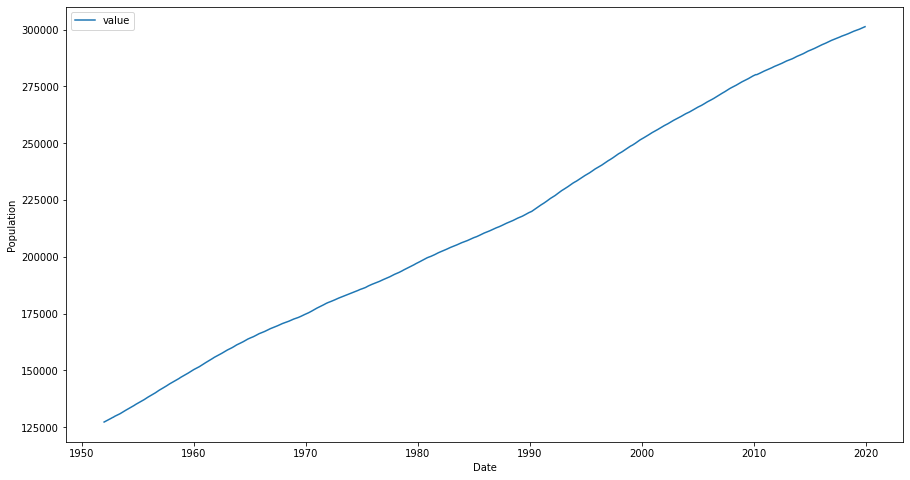

In [102]:
plt.figure(figsize=(15,8))
plt.plot(pop_data,label = 'value')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.show()

In [103]:
# checking for stationarity
rollmean = pop_data.rolling(window=12).mean()
rollstd = pop_data.rolling(window=12).std()

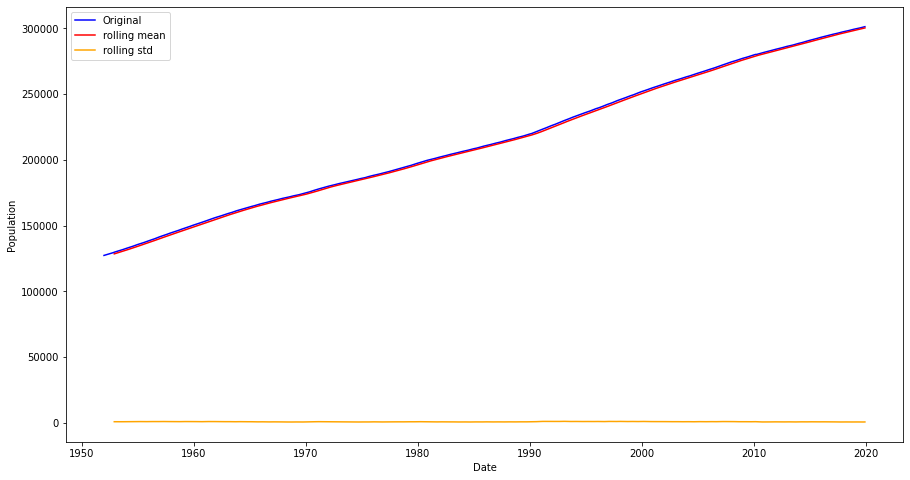

In [104]:
plt.figure(figsize=(15,8))
plt.plot(pop_data,label='Original',color='blue')
plt.plot(rollmean,label='rolling mean',color='red')
plt.plot(rollstd,label='rolling std',color='orange')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.show()

In [105]:
#from above graph it is clear that mean is not constant ,so data is not stationary.

# using ADFuller test

from statsmodels.tsa.stattools import adfuller

#creating function for ADFuller test

def adf_test(data):
  adftest = adfuller(data, autolag = 'AIC')
  print("1. ADF:", adftest[0])
  print('2. p-value:',adftest[1])
  print('3. Num of lags:',adftest[2])
  print('4. num of observations used for regression and critical value calcualtion:',adftest[3])
  print('5. Critical values:')
  for key,val in adftest[4].items():
    print("\t",key, ": ",val)

In [106]:
adf_test(pop_data.value)

1. ADF: -0.6653174109473156
2. p-value: 0.855529777911024
3. Num of lags: 17
4. num of observations used for regression and critical value calcualtion: 798
5. Critical values:
	 1% :  -3.4385711275998583
	 5% :  -2.8651686574447375
	 10% :  -2.568702230639255


#from above ADF test p is 0.855 > 0.05 so we fail to reject null hypothesis. Data is non stationary.

# converting data  into stationary

Applying log transformation on data

In [107]:
log_pop = np.log(pop_data)
log_pop.head()

,value
date,
1952-01-01,11.754294
1952-02-01,11.756005
1952-03-01,11.757603
1952-04-01,11.759262
1952-05-01,11.760801


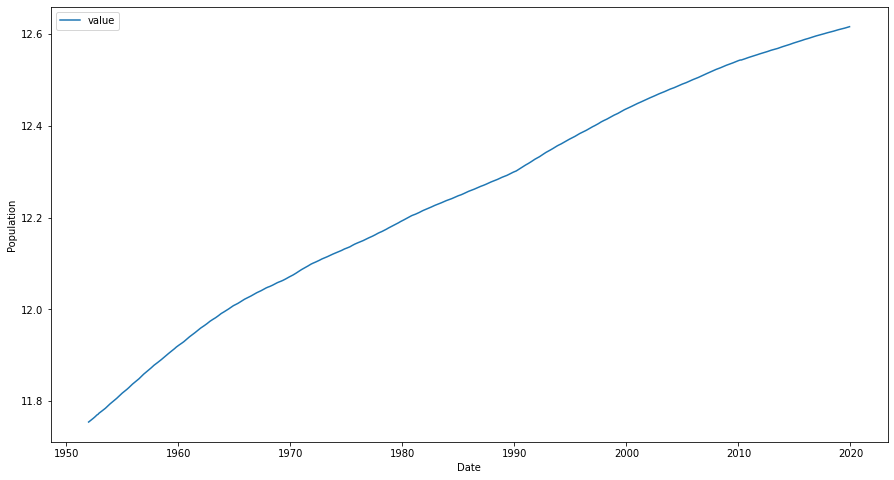

In [108]:
# plotting fpr log data
plt.figure(figsize=(15,8))
plt.plot(log_pop,label = 'value')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.show()

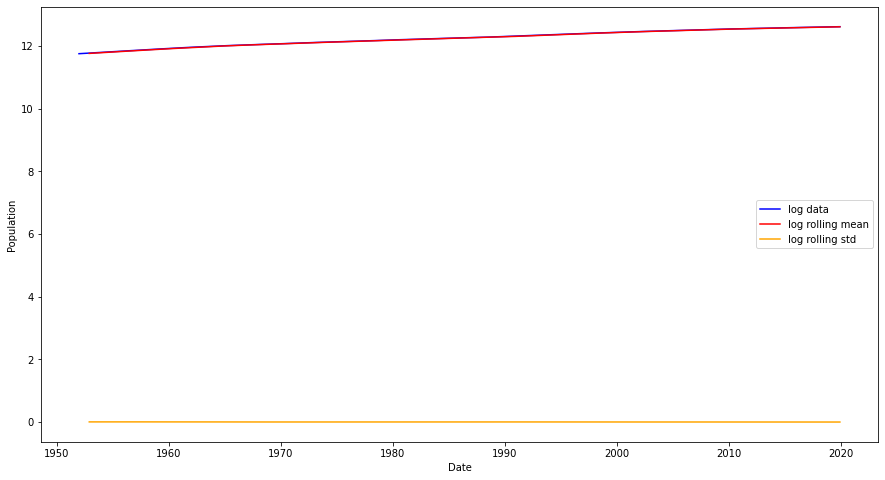

In [109]:
#checking for rolling mean and rolling std on log data and plotting the curve
log_rollmean = log_pop.rolling(window=12).mean()
log_rollstd = log_pop.rolling(window=12).std()
plt.figure(figsize=(15,8))
plt.plot(log_pop,label='log data',color='blue')
plt.plot(log_rollmean,label='log rolling mean',color='red')
plt.plot(log_rollstd,label='log rolling std',color='orange')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.show()

# again mean is not constant, log data is also not stationary


In [110]:
# applying ADF test on log data

adf_test(log_pop.value)

1. ADF: -2.092019387129422
2. p-value: 0.24773573149002903
3. Num of lags: 17
4. num of observations used for regression and critical value calcualtion: 798
5. Critical values:
	 1% :  -3.4385711275998583
	 5% :  -2.8651686574447375
	 10% :  -2.568702230639255


#Again p-value is 0.247 > 0.05 , so data is not stationary

# applying difference 

In [111]:
log_pop_diff = log_pop - log_rollmean


In [112]:
log_pop_diff

,value
date,
1952-01-01,NaN
1952-02-01,NaN
1952-03-01,NaN
1952-04-01,NaN
1952-05-01,NaN
...,...
2019-08-01,0.003019
2019-09-01,0.003113
2019-10-01,0.003212


In [113]:
log_pop_diff = log_pop_diff.dropna()
log_pop_diff

,value
date,
1952-12-01,0.009811
1953-01-01,0.009748
1953-02-01,0.009553
1953-03-01,0.009237
1953-04-01,0.009139
...,...
2019-08-01,0.003019
2019-09-01,0.003113
2019-10-01,0.003212


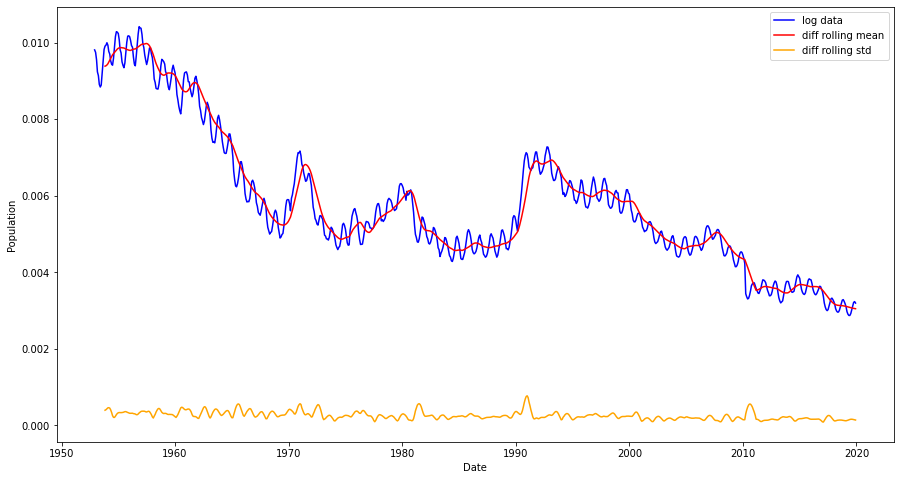

In [114]:
# checking for stationarity of differenced log data and plotting them

diff_log_mvg = log_pop_diff.rolling(window=12).mean()
diff_log_std = log_pop_diff.rolling(window=12).std()
plt.figure(figsize=(15,8))
plt.plot(log_pop_diff,label='log data',color='blue')
plt.plot(diff_log_mvg,label='diff rolling mean',color='red')
plt.plot(diff_log_std,label='diff rolling std',color='orange')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.show()
#average of differenced data is also not constant , so data is still not stationary

In [115]:
# ADF test on differenced log data

adf_test(log_pop_diff.value)

1. ADF: -1.8737421841201827
2. p-value: 0.34451262406472083
3. Num of lags: 17
4. num of observations used for regression and critical value calcualtion: 787
5. Critical values:
	 1% :  -3.438686413400388
	 5% :  -2.8652194721349424
	 10% :  -2.5687293001910008


#again p-value is 0.344 > 0.05 , so data is not sationary

#taking log difference again

In [116]:
diff2_log_pop = log_pop_diff - diff_log_mvg

In [117]:
diff2_log_pop.head()

,value
date,
1952-12-01,NaN
1953-01-01,NaN
1953-02-01,NaN
1953-03-01,NaN
1953-04-01,NaN


In [118]:
diff2_log_pop = diff2_log_pop.dropna()
diff2_log_pop.head()

,value
date,
1953-11-01,0.000525
1953-12-01,0.000539
1954-01-01,0.000581
1954-02-01,0.000484
1954-03-01,0.000278


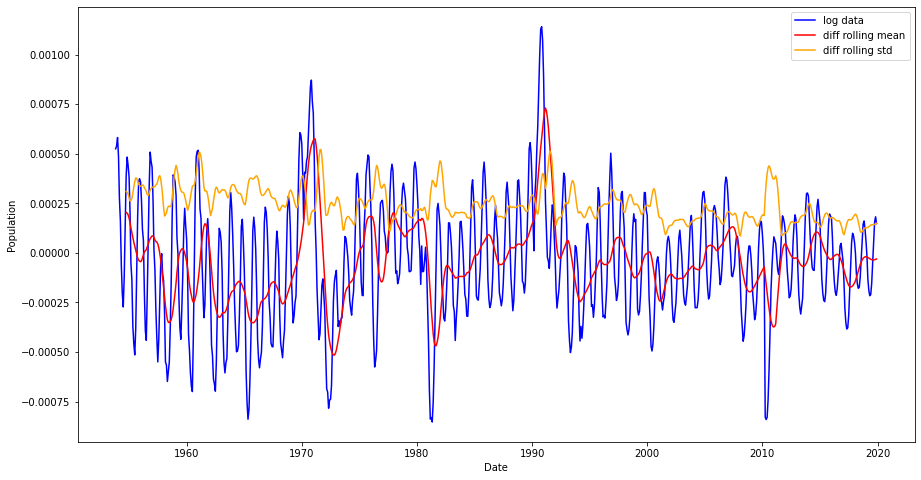

In [119]:
# checking for stationarity of differenced log data and plotting them

diff2_log_mvg = diff2_log_pop.rolling(window=12).mean()
diff2_log_std = diff2_log_pop.rolling(window=12).std()
plt.figure(figsize=(15,8))
plt.plot(diff2_log_pop,label='log data',color='blue')
plt.plot(diff2_log_mvg,label='diff rolling mean',color='red')
plt.plot(diff2_log_std,label='diff rolling std',color='orange')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.show()

In [120]:
#applyitn ADF test on second differenced data
adf_test(diff2_log_pop.value)

1. ADF: -4.201286686439749
2. p-value: 0.0006556035314646877
3. Num of lags: 18
4. num of observations used for regression and critical value calcualtion: 775
5. Critical values:
	 1% :  -3.4388159246521433
	 5% :  -2.865276554696385
	 10% :  -2.5687597090530696


#now p-value is 0.00065 < 0.05 , so we reject null hypothesis and second differenced data is stationary

#finding p,d,q values

In [121]:
# After installing I commented this pmdarima as if we run again it is throwing  error.
# !pip install pmdarima

In [122]:
from pmdarima import auto_arima

In [123]:
#best p, d, q values on second differenced data
stepwise_fitting = auto_arima(diff2_log_pop.value,trace = True)
stepwise_fitting.summary()

# best fit p,d,q values for ARIMA model on second differenced log data is ARIMA(3,0,4)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-12786.116, Time=1.56 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-10584.772, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-11991.424, Time=0.17 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-10582.769, Time=0.72 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-10571.375, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-12391.892, Time=1.20 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-12749.814, Time=0.45 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-12840.917, Time=0.65 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-12758.318, Time=1.39 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-10572.262, Time=1.28 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-10572.257, Time=1.39 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-12763.998, Time=0.65 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-12740.939, Time=0.67 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=-12832.099, Time=0.82 sec
 ARIM

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  794
Model:               SARIMAX(3, 0, 4)   Log Likelihood                6485.629
Date:                Mon, 16 May 2022   AIC                         -12953.259
Time:                        06:59:55   BIC                         -12911.165
Sample:                             0   HQIC                        -12937.083
                                - 794                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -3.695e-06   1.17e-06     -3.150      0.002      -6e-06    -1.4e-06
ar.L1          2.5543      0.003   1020.358      0.000       2.549       2.559
ar.L2         -2.4210      0.001  -2932.647      0.000      -2.423      -2.419
ar.L3          0.8290      0.002    369.625      0.000       0.825       0.833
ma.L1         -1.1465      0.000  -3861.429      0.000      -1.147      -1.146
ma.L2          0.4657      0.000   1745.430      0.000       0.465       0.466
ma.L3          0.0372      0.000    163.773      0.000       0.037       0.038
ma.L4          0.0807      0.000    515.923      0.000       0.080       0.081
sigma2      4.971e-09   1.05e-10     47.175      0.000    4.76e-09    5.18e-09
===================================================================================
Ljung-Box (L1) (Q):                   3.52   Jarque-Bera (JB):              6014.03
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):               0.49   Skew:                            -0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.66e+18. Standard errors may be unstable.
"""

In [124]:
# p,d ,q values on raw data
stepwise_fitting = auto_arima(pop_data.value,trace = True)
stepwise_fitting.summary()

#from below result best p,d,q values for ARIMA model on raw population data is ARIMA(3,2,5)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=7351.451, Time=0.47 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=7389.026, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=7381.987, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=7383.820, Time=0.15 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=7311.381, Time=0.32 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=7365.358, Time=0.14 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=7377.876, Time=0.18 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=7366.475, Time=0.37 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=7351.871, Time=0.31 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=7373.282, Time=0.25 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=6866.707, Time=1.51 sec
 ARIMA(3,2,3)(0,0,0)[0]             : AIC=7345.961, Time=1.93 sec
 ARIMA(2,2,4)(0,0,0)[0]             : AIC=inf, Time=2.13 sec
 ARIMA(1,2,4)(0,0,0)[0]             : AIC=7247.280, Time=0.67 sec
 ARIMA(3,2,2)(0,0,0)[0]             : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  816
Model:               SARIMAX(3, 2, 5)   Log Likelihood               -3414.140
Date:                Mon, 16 May 2022   AIC                           6846.279
Time:                        07:00:18   BIC                           6888.597
Sample:                             0   HQIC                          6862.522
                                - 816                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7522      0.030     25.008      0.000       0.693       0.811
ar.L2          0.6957      0.052     13.299      0.000       0.593       0.798
ar.L3         -0.9789      0.030    -32.478      0.000      -1.038      -0.920
ma.L1         -1.4199      0.036    -39.051      0.000      -1.491      -1.349
ma.L2         -0.1924      0.093     -2.066      0.039      -0.375      -0.010
ma.L3          1.4016      0.098     14.327      0.000       1.210       1.593
ma.L4         -0.6183      0.062    -10.023      0.000      -0.739      -0.497
ma.L5         -0.0161      0.034     -0.466      0.641      -0.084       0.052
sigma2       253.4737      4.088     61.997      0.000     245.460     261.487
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             76420.08
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                            -2.37
Prob(H) (two-sided):                  0.66   Kurtosis:                        50.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#building ARIMA model on raw populaton data ARIMA(3,2,5)

In [125]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [126]:
pop_data.head()

,value
date,
1952-01-01,127299.0
1952-02-01,127517.0
1952-03-01,127721.0
1952-04-01,127933.0
1952-05-01,128130.0


In [127]:
pop_data.shape

(816, 1)

In [128]:
#splitting data into 70:30 ratio
816*0.7

571.1999999999999

In [129]:
train_raw_data = pop_data.iloc[:572]
test_raw_data = pop_data.iloc[572:]
train_raw_data.shape

(572, 1)

In [130]:
test_raw_data.shape

(244, 1)

In [131]:
model_raw = sm.tsa.arima.ARIMA(train_raw_data.value,order=(3,2,5))
model_raw_fit = model_raw.fit()

In [132]:
start_raw = len(train_raw_data)
end_raw = len(train_raw_data)+len(test_raw_data)-1
pred_raw = model_raw_fit.predict(start = start_raw, end=end_raw, type='levels').rename('ARIMA predictions')

In [133]:
pred_raw

1999-09-01    250892.000391
1999-10-01    251182.109238
1999-11-01    251455.312521
1999-12-01    251711.833943
2000-01-01    251953.108576
                  ...      
2019-08-01    314899.572903
2019-09-01    315194.608421
2019-10-01    315476.646238
2019-11-01    315741.843013
2019-12-01    315990.964164
Freq: MS, Name: ARIMA predictions, Length: 244, dtype: float64

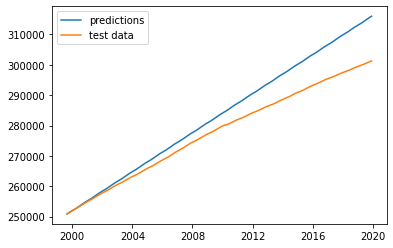

In [134]:
plt.plot(pred_raw,label='predictions')
plt.plot(test_raw_data,label='test data')
plt.legend()
plt.show()

In [135]:
#calculating RMSE value
mse_raw = mean_squared_error(test_raw_data.value,pred_raw)
rmse_raw = np.sqrt(mse_raw)
print('RMSE value of raw population data:',rmse_raw)
print('raw population data mean: ',pop_data.mean())

RMSE value of raw population data: 7052.10446537814
raw population data mean:  value    214837.767826
dtype: float64


In [136]:
test_raw_data.mean()

value    277831.174369
dtype: float64

In [137]:
pred_raw.mean()

283403.1245811977

In [138]:
pop_data.shape

(816, 1)

In [139]:
pop_data.tail()

,value
date,
2019-08-01,300581.333
2019-09-01,300775.872
2019-10-01,300972.035
2019-11-01,301144.949
2019-12-01,301299.946


In [147]:
future_dates =pd.to_datetime(['2020-01-01','2020-02-01','2020-03-01','2020-04-01','2020-05-01','2020-06-01'])

future_dates

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01'],
              dtype='datetime64[ns]', freq=None)

In [152]:
#predicting and plotting for next 6 months
forecast_6months = model_raw_fit.predict(start = '2020-01-01', end='2020-06-01', type='levels').rename('ARIMA predictions')
forecast_6months

2020-01-01    316229.021742
2020-02-01    316464.077935
2020-03-01    316704.925554
2020-04-01    316958.870860
2020-05-01    317229.623163
2020-06-01    317516.441488
Freq: MS, Name: ARIMA predictions, dtype: float64

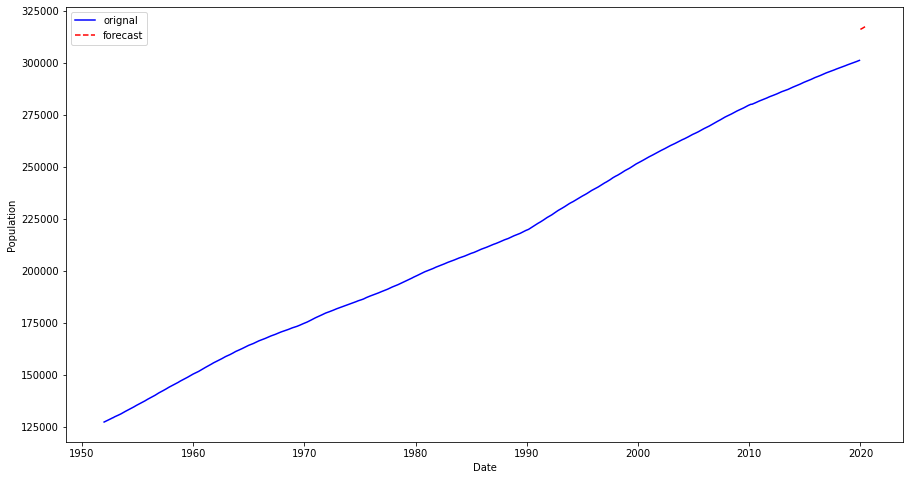

In [159]:
plt.figure(figsize=(15,8))
plt.plot(pop_data,label='orignal',color='blue')
plt.plot(forecast_6months,label='forecast',color='red',linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.show()